In [1]:
%matplotlib inline
import plot
import market
import metrics
from decimal import Decimal
import pandas

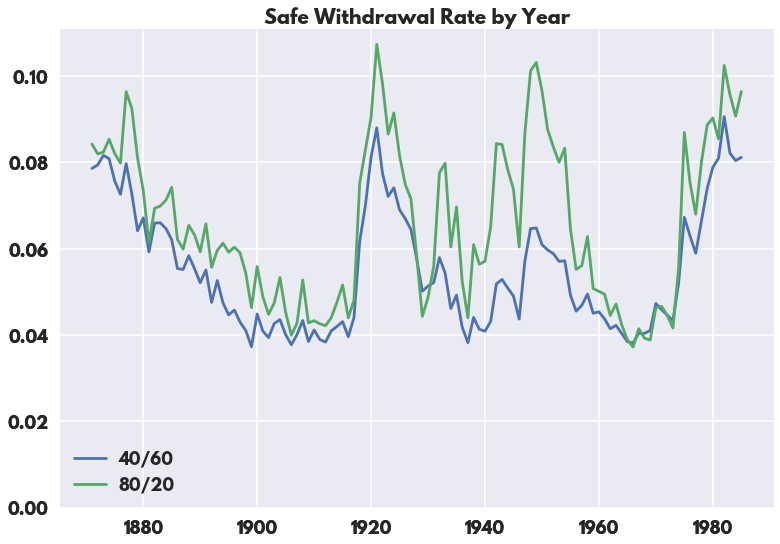

In [2]:
m = market.Returns_US_1871()
years = 30
start_year = 1871
last_year = 2015-years

def run(stock_pct):
    swrs = pandas.Series()
    for _ in range(last_year - start_year + 1):
        returns = []
#        if start_year + _ in (1965,1966,1967,1968,1969): continue
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stocks = annual_returns.stocks - annual_returns.inflation
            bonds = annual_returns.bonds - annual_returns.inflation
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swr = float(metrics.ssr(returns))
#        print(start_year+_, swr)
        swrs.loc[start_year+_] = swr
    return swrs

six = run(Decimal('.6'))
four = run(Decimal('.4'))
eight = run(Decimal('.8'))

#diff = filter(lambda x: x>0, [(x[0] - x[1])*100 for x in zip(eight, four)])

plot.plot_n({'80/20': eight, '40/60' : four}, '', 'Safe Withdrawal Rate by Year', add_commas=False)
#plot.plot_n({'80/20 - 40/60' : list(diff)}, '', 'SWR Tell Tale Chart', add_commas=False, zero_based=False)

In [3]:
six.sort_values(inplace=True)
six

1966    0.037990
1965    0.039008
1906    0.039221
1968    0.040159
1969    0.040295
1912    0.040619
1909    0.040963
1911    0.041134
1967    0.041286
1964    0.041686
1907    0.041857
1937    0.041872
1899    0.041958
1916    0.042220
1902    0.042447
1910    0.042607
1913    0.042913
1973    0.042957
1905    0.043025
1962    0.043298
1963    0.045014
1972    0.045052
1901    0.045179
1914    0.045181
1903    0.045481
1917    0.046620
1971    0.046724
1961    0.046871
1970    0.047246
1898    0.047686
          ...   
1926    0.072296
1879    0.072693
1951    0.073302
1978    0.073316
1925    0.076488
1876    0.076729
1975    0.077003
1919    0.077171
1950    0.077981
1875    0.079324
1923    0.080326
1872    0.081104
1979    0.081407
1871    0.081781
1948    0.082360
1873    0.082463
1878    0.082637
1949    0.083183
1981    0.083594
1874    0.083608
1924    0.083856
1980    0.084880
1984    0.085907
1920    0.086913
1877    0.088321
1922    0.088681
1985    0.089017
1983    0.0892